In [1]:
# Using the PyWavelets module, available at 
# https://pywavelets.readthedocs.io/en/latest/install.html

from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

A = imread('jupiter_vortices.jpg')
B = np.mean(A, -1); # Convert RGB to grayscale

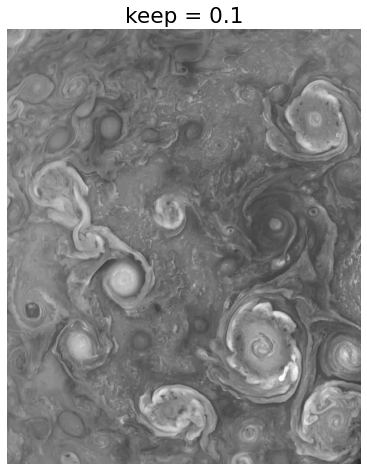

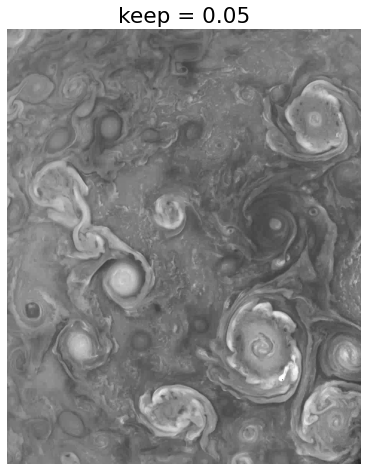

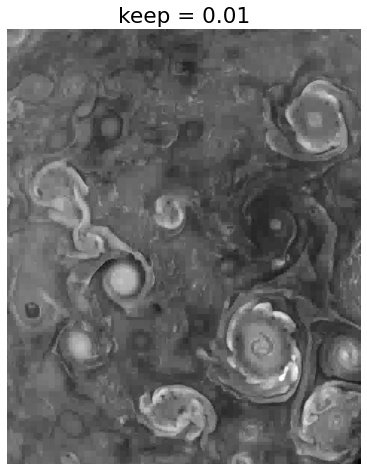

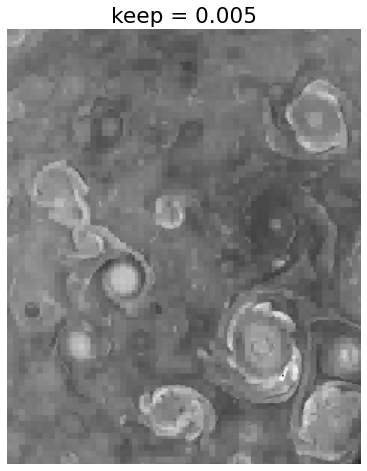

In [2]:
## Wavelet Compression
n = 4
w = 'db1'
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in (0.1, 0.05, 0.01, 0.005):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices
    
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('keep = ' + str(keep))


# Calculating the area of the white Vortices on Jupiter

#### Considering the wavelet compressed image (keep = 0.1)

In [3]:
Arecon.shape

(1172, 952)

In [4]:
keep = 0.05
thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
ind = np.abs(coeff_arr) > thresh
Cfilt = coeff_arr * ind # Threshold small indices
coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
Arecon = pywt.waverec2(coeffs_filt,wavelet=w)

ans1=[0]*100;
for k in range(155, 255):
    for i in range(Arecon.shape[0]):
        for j in range(Arecon.shape[1]):
            if Arecon[i,j]>=k: 
                ans1[k-155] = ans1[k-155]+1

In [5]:
keep = 0.1
thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
ind = np.abs(coeff_arr) > thresh
Cfilt = coeff_arr * ind # Threshold small indices
coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
Arecon = pywt.waverec2(coeffs_filt,wavelet=w)

ans=[0]*100;
for k in range(155, 255):
    for i in range(Arecon.shape[0]):
        for j in range(Arecon.shape[1]):
            if Arecon[i,j]>=k: 
                ans[k-155] = ans[k-155]+1



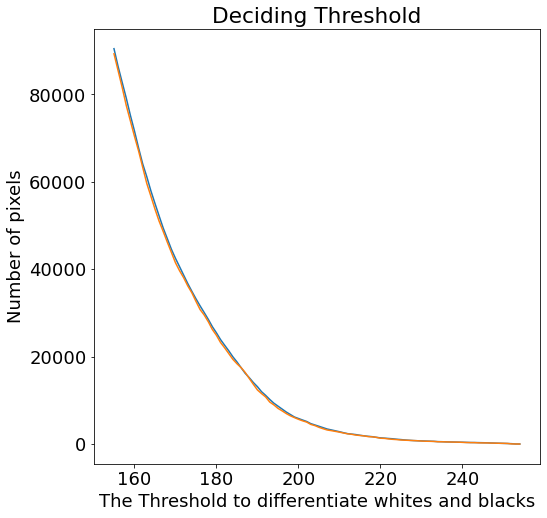

In [6]:
total = Arecon.shape[0]*Arecon.shape[1] 

plt.plot(range(155,255), ans)
plt.plot(range(155,255), ans1)

plt.xlabel('The Threshold to differentiate whites and blacks')

plt.ylabel('Number of pixels')
  

plt.title('Deciding Threshold')
  

plt.show()

### From the above graph, there is a sudden change of slope at around 200 intensity, therefore we can consider 200 intensity as ideal for differentiating between whites and blacks in the above picture. 

The above graph is important to understand and decide a threshold to differentiate the whites and blacks, because the image we have to analyse isnt a binary image of only blacks and whites. 
The reason for considering sudden change of slope as the threshold is:
By observing the image it is evident that there are more blacks than whites (the region we need to calculate). And determination of that particular white intensity (whose share in the total pixels is less) is difficult unless the distribution of different intensities is observed. 


### ratio of white vortices is:

In [7]:
ratio = ans[190-155] / total

In [8]:
print(ratio)

0.01175448848481372


## Observations

From observing the impact of compression on the ratio, it is clear that there is no or little variation of compression on the area of the white vortices.